In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score



d:\gradio\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=pd.read_csv(r'customer_data.csv')

In [11]:
model = joblib.load(r'D:\gradio\venv\src\decision_tree_model_2.jodlib')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\gradio\\venv\\src\\decision_tree_model_2.jodlib'

In [9]:
df.shape

(500, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            500 non-null    int64  
 1   Name                   500 non-null    object 
 2   Email Address          500 non-null    object 
 3   Age                    500 non-null    int64  
 4   Location               500 non-null    object 
 5   Income                 500 non-null    int64  
 6   Occupation             500 non-null    object 
 7   Laptop Brands          500 non-null    object 
 8   Price                  500 non-null    float64
 9   Frequency of Use       500 non-null    object 
 10  Purpose                500 non-null    object 
 11  Previous Brands Owned  500 non-null    object 
 12  Satisfaction Rating    500 non-null    int64  
 13  Tech Knowledge Level   500 non-null    object 
 14  Cart Abandonment       500 non-null    object 
dtypes: flo

In [12]:
df.describe()

,Customer ID,Age,Income,Price,Satisfaction Rating
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,5.501118e+07,44.710000,92450.280000,1120.345985,3.076000
std,2.670183e+07,15.349956,73670.440406,504.596962,1.396468
min,1.015490e+07,18.000000,35017.000000,303.141078,1.000000
25%,3.194826e+07,32.000000,41472.000000,660.196384,2.000000
50%,5.835498e+07,45.000000,55554.500000,1090.961049,3.000000
75%,7.798655e+07,59.000000,129923.000000,1589.313765,4.000000
max,9.959759e+07,70.000000,297504.000000,1995.591002,5.000000


In [13]:
df.head()

,Customer ID,Name,Email Address,Age,Location,Income,Occupation,Laptop Brands,Price,Frequency of Use,Purpose,Previous Brands Owned,Satisfaction Rating,Tech Knowledge Level,Cart Abandonment
0,68338060,Scott Rodriguez,davidolson@example.com,22,Small City,35046,Skilled Employee/official,Acer,477.996976,Weekly,Work,Professor parent.,4,Intermediate,No
1,25840471,Amanda Wilkins,erika47@example.net,41,Small City,40704,Skilled Employee/official,HP,365.630603,Daily,Work,Foreign.,4,Intermediate,No
2,66190121,Robert Mccarthy,kathleenmartin@example.com,54,Big City,51396,Management/self-employed/highly qualified empl...,Asus,405.159528,Weekly,Work,Analysis.,3,Intermediate,No
3,35744722,Austin Mayo,coxadam@example.net,21,Small City,40111,Unemployed/Unskilled,Apple,1868.287590,Daily,Entertainment,Town order.,5,Beginner,No
4,43912803,Mike Parker,barry29@example.org,40,Midsize-City,69867,Management/self-employed/highly qualified empl...,Lenovo,443.324893,Daily,Entertainment,Item.,3,Advanced,Yes


In [14]:
df['Price'] = df['Price'].round(2)

In [15]:
df.tail()

,Customer ID,Name,Email Address,Age,Location,Income,Occupation,Laptop Brands,Price,Frequency of Use,Purpose,Previous Brands Owned,Satisfaction Rating,Tech Knowledge Level,Cart Abandonment
495,97934360,Stacy Calderon,russellalexander@example.com,43,Small City,39752,Management/self-employed/highly qualified empl...,Dell,1945.53,Rarely,Gaming,Walk.,2,Beginner,No
496,92928905,John Allen,gwalker@example.com,47,Big City,63350,Unemployed/Unskilled,Apple,751.04,Daily,Work,Total certainly.,4,Advanced,No
497,35507165,Kathleen Morales,emilydavidson@example.com,51,Big City,268474,Management/self-employed/highly qualified empl...,Asus,1273.18,Weekly,Gaming,Fund.,5,Advanced,No
498,93037802,Adam Young,michellethompson@example.net,67,Big City,53585,Management/self-employed/highly qualified empl...,Dell,366.65,Weekly,Gaming,Democrat hear.,1,Advanced,No
499,91812286,Brian Harrington,james24@example.org,68,Big City,223542,Skilled Employee/official,Acer,1559.66,Daily,Work,Though family.,4,Expert,No


In [16]:
df['Laptop Brands'].value_counts()

Laptop Brands
Apple     101
Dell       98
Acer       86
Asus       73
HP         71
Lenovo     71
Name: count, dtype: int64

In [17]:
# Group by a column and calculate the mean
grouped_data = df.groupby('Location')['Age'].mean()
grouped_data

Location
Big City        44.654545
Midsize-City    42.786982
Small City      47.747748
Name: Age, dtype: float64

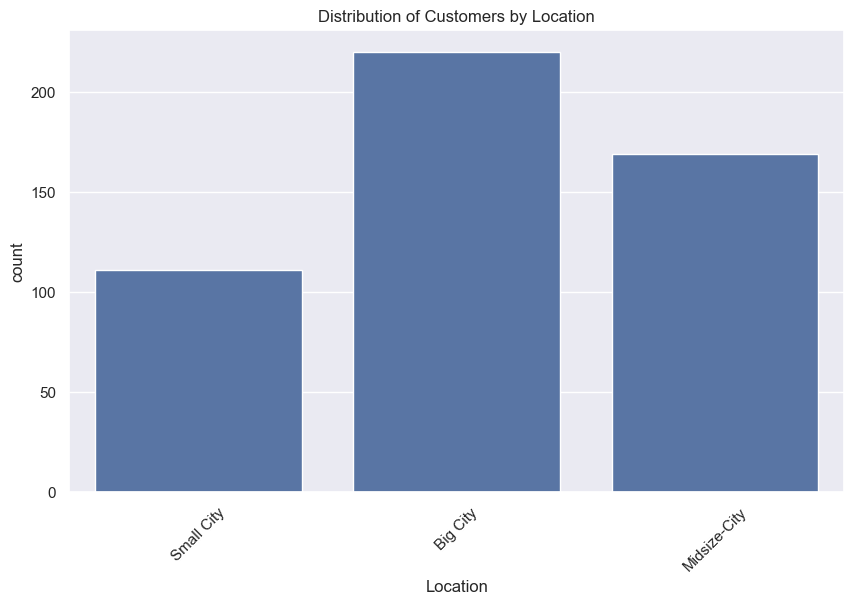

In [18]:

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location')
plt.xticks(rotation=45)
plt.title('Distribution of Customers by Location')
plt.show()


In [19]:
# Use the 'value_counts()' function to count the occurrences of each laptop brand
laptop_brand_counts = df['Laptop Brands'].value_counts()

# Get the top ten selling laptop brands
top_10_laptop_brands = laptop_brand_counts.head(10)

print(top_10_laptop_brands)


Laptop Brands
Apple     101
Dell       98
Acer       86
Asus       73
HP         71
Lenovo     71
Name: count, dtype: int64


C:\Users\Pc\AppData\Local\Temp\ipykernel_18644\2107998802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_laptop_brands.index, y=top_10_laptop_brands.values, palette="viridis")


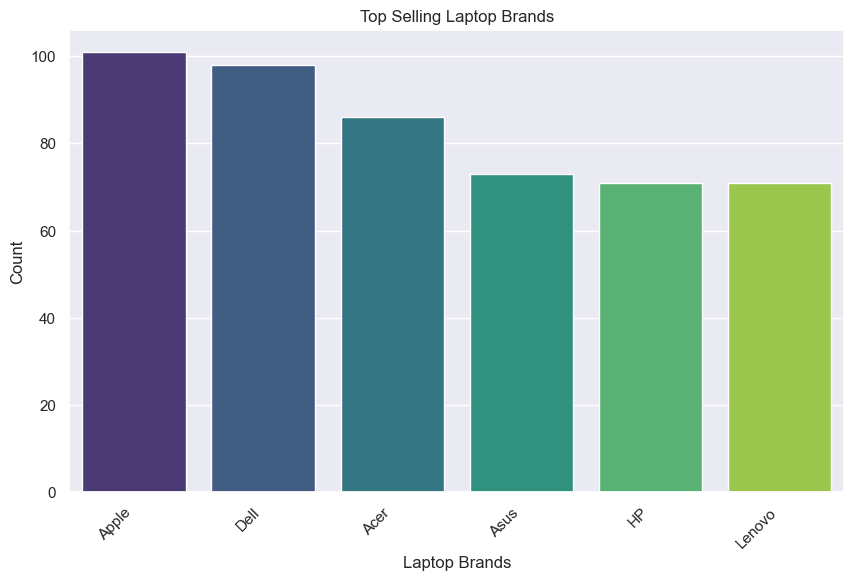

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_laptop_brands.index, y=top_10_laptop_brands.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Laptop Brands")
plt.ylabel("Count")
plt.title("Top Selling Laptop Brands")
plt.show()

In [21]:
occupation=df['Occupation'].value_counts()

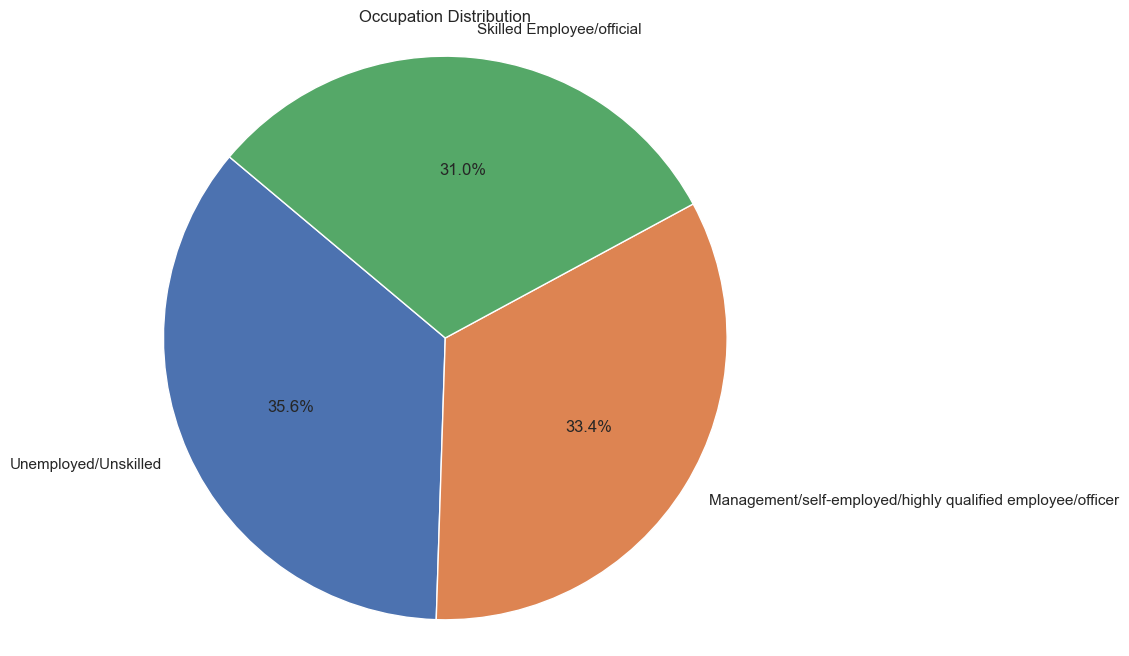

In [22]:
occupation_counts = df['Occupation'].value_counts()

# Create a pie chart with labels
plt.figure(figsize=(8, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Occupation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [23]:
df['Cart Abandonment']= df['Cart Abandonment'].replace({'Yes':1, 'No': 0}).astype(int)

In [24]:
# Assuming you have your DataFrame df
columnsdrop = ['Customer ID', 'Name', 'Email Address','Previous Brands Owned']

# Use the drop method to remove the specified columns
df1 =df.drop(columns=columnsdrop)

In [25]:
categorical_columns = ['Location', 'Occupation', 'Laptop Brands', 'Frequency of Use', 'Purpose',  'Tech Knowledge Level']
# Use pd.get_dummies to encode the categorical columns
encoded_df = pd.get_dummies(df1, columns=categorical_columns)

# Display the result
encoded_df

,Age,Income,Price,Satisfaction Rating,Cart Abandonment,Location_Big City,Location_Midsize-City,Location_Small City,Occupation_Management/self-employed/highly qualified employee/officer,Occupation_Skilled Employee/official,...,Frequency of Use_Daily,Frequency of Use_Rarely,Frequency of Use_Weekly,Purpose_Entertainment,Purpose_Gaming,Purpose_Work,Tech Knowledge Level_Advanced,Tech Knowledge Level_Beginner,Tech Knowledge Level_Expert,Tech Knowledge Level_Intermediate
0,22,35046,478.00,4,0,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
1,41,40704,365.63,4,0,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,True
2,54,51396,405.16,3,0,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
3,21,40111,1868.29,5,0,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
4,40,69867,443.32,3,1,False,True,False,True,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,43,39752,1945.53,2,0,False,False,True,True,False,...,False,True,False,False,True,False,False,True,False,False
496,47,63350,751.04,4,0,True,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
497,51,268474,1273.18,5,0,True,False,False,True,False,...,False,False,True,False,True,False,True,False,False,False
498,67,53585,366.65,1,0,True,False,False,True,False,...,False,False,True,False,True,False,True,False,False,False


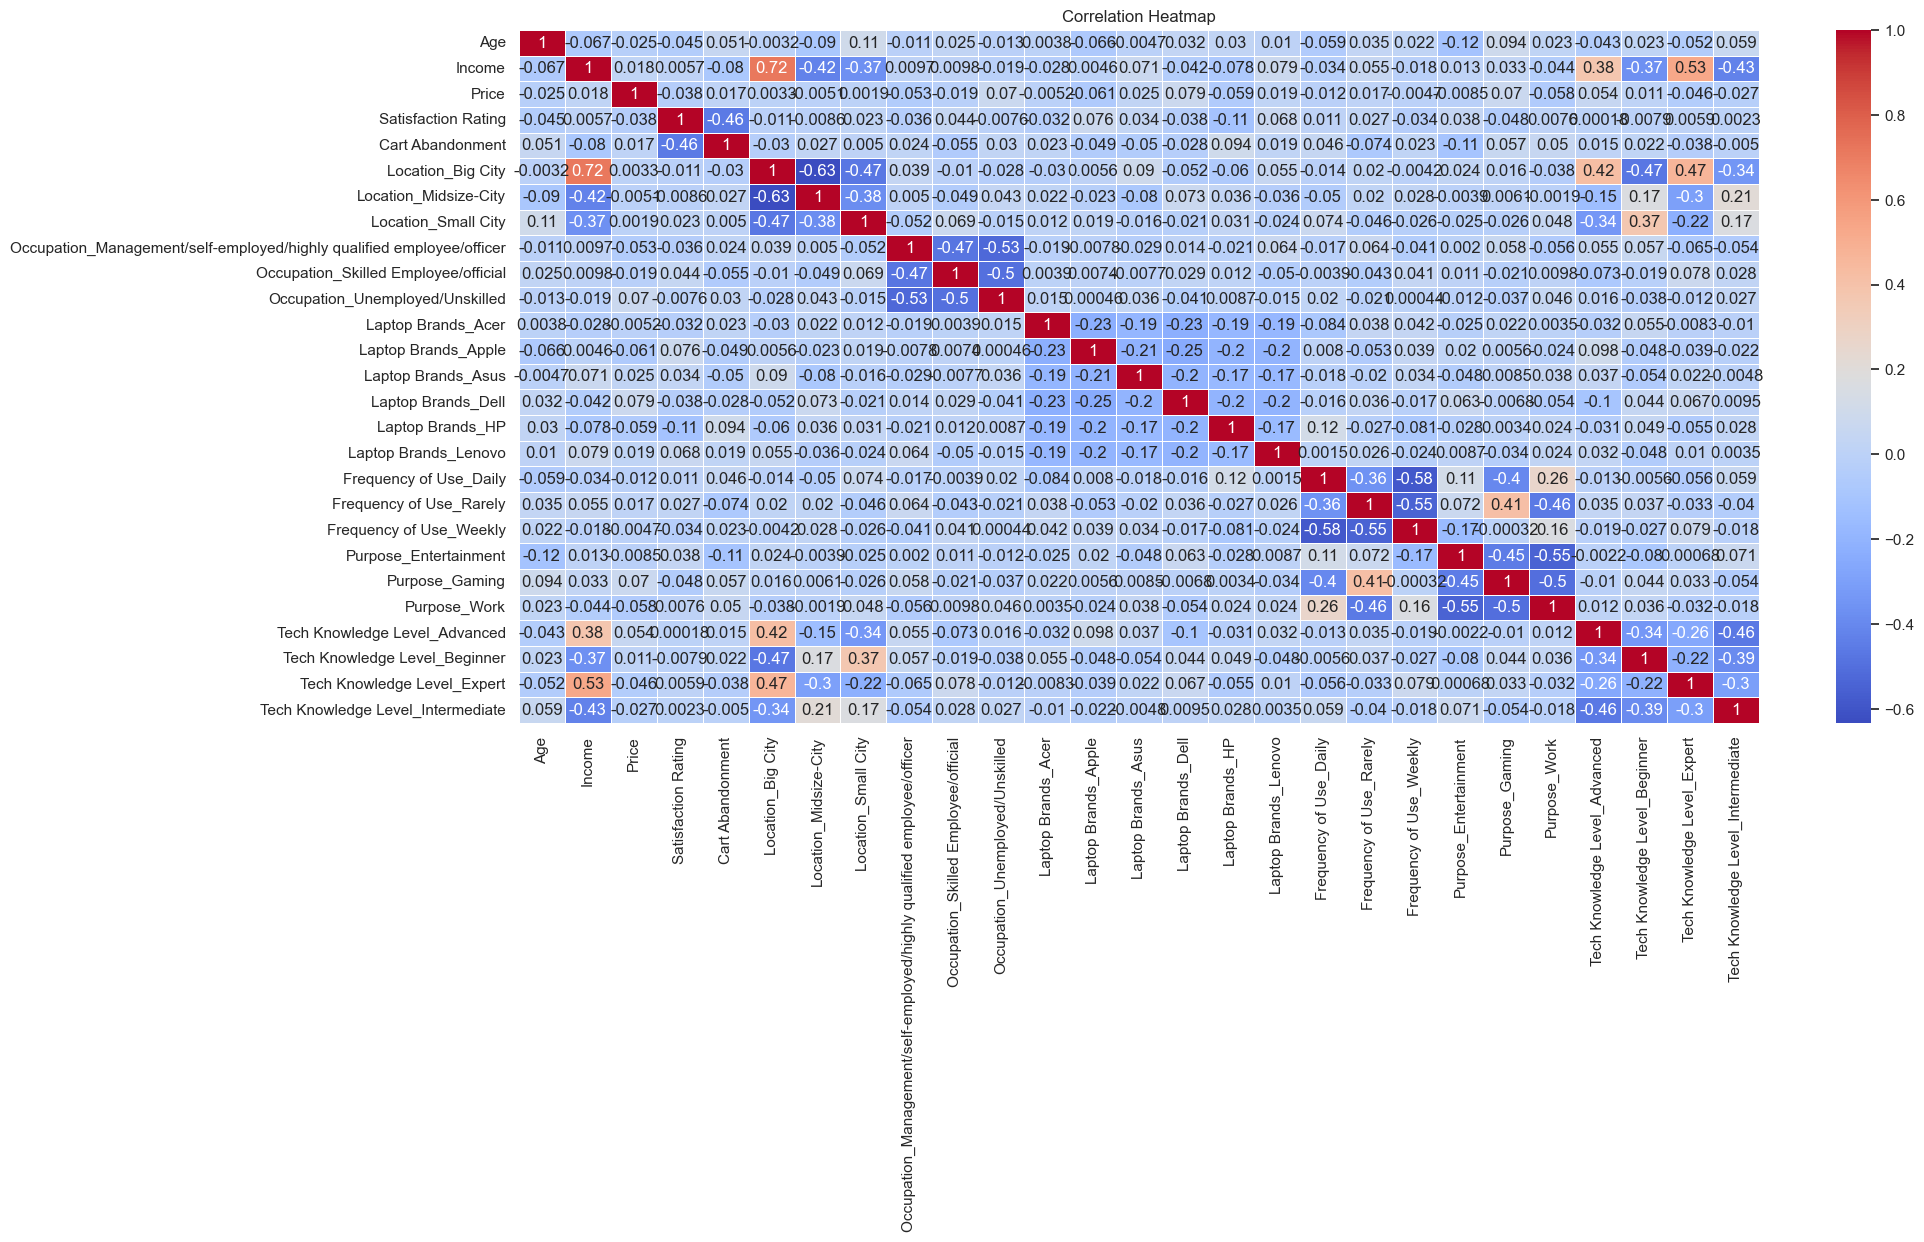

In [26]:
correlation_matrix = encoded_df.corr()

# Create a heatmap using seaborn with 'viridis' colormap
plt.figure(figsize=(20, 9))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()


In [27]:
encoded_df.shape

(500, 27)

In [28]:
# Define your target variable and features
X = encoded_df.drop(columns=['Cart Abandonment'])  # Features
y = encoded_df['Cart Abandonment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



d:\gradio\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\gradio\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\gradio\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


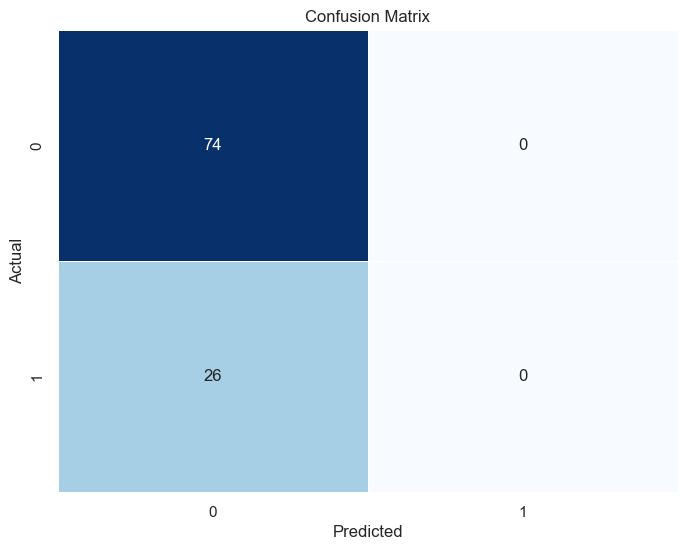

In [29]:
# Plot the confusion matrix as a heatmap
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        74
           1       0.52      0.58      0.55        26

    accuracy                           0.75       100
   macro avg       0.68      0.69      0.69       100
weighted avg       0.76      0.75      0.75       100



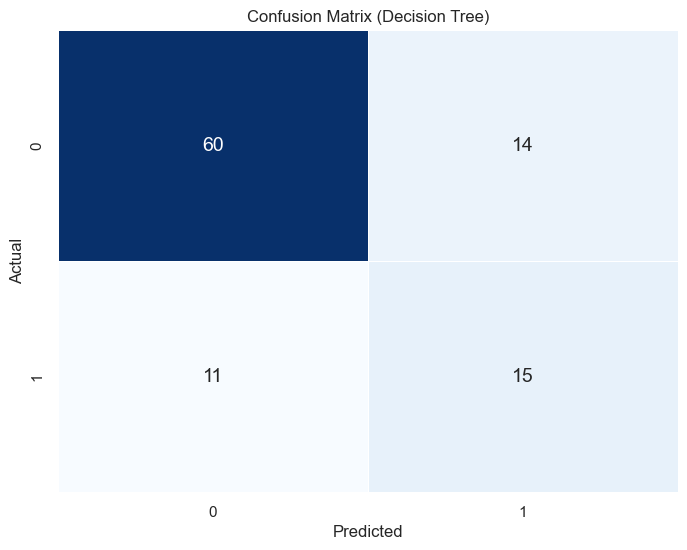

In [30]:
# Define your target variable and features
X = encoded_df.drop(columns=['Cart Abandonment'])  # Features
y = encoded_df['Cart Abandonment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred1)
report = classification_report(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Get TP, TN, FP, FN values from the confusion matrix
tn, fp, fn, tp = confusion.ravel()

# Plot the confusion matrix with TP, TN, FP, FN annotations
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False,
            annot_kws={"fontsize": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of cross-validation scores
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

print("Cross-Validation Mean Accuracy:", mean_cv_accuracy)
print("Cross-Validation Accuracy Std:", std_cv_accuracy)


Cross-Validation Mean Accuracy: 0.686
Cross-Validation Accuracy Std: 0.036110940170535566


In [32]:
import time

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Measure prediction time
start_time = time.time()
y_pred1 = model.predict(X_test)
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")


Training Time: 0.028616905212402344 seconds
Prediction Time: 0.0048160552978515625 seconds


In [33]:
encoded_df.columns

Index(['Age', 'Income', 'Price', 'Satisfaction Rating', 'Cart Abandonment',
       'Location_Big City', 'Location_Midsize-City', 'Location_Small City',
       'Occupation_Management/self-employed/highly qualified employee/officer',
       'Occupation_Skilled Employee/official',
       'Occupation_Unemployed/Unskilled', 'Laptop Brands_Acer',
       'Laptop Brands_Apple', 'Laptop Brands_Asus', 'Laptop Brands_Dell',
       'Laptop Brands_HP', 'Laptop Brands_Lenovo', 'Frequency of Use_Daily',
       'Frequency of Use_Rarely', 'Frequency of Use_Weekly',
       'Purpose_Entertainment', 'Purpose_Gaming', 'Purpose_Work',
       'Tech Knowledge Level_Advanced', 'Tech Knowledge Level_Beginner',
       'Tech Knowledge Level_Expert', 'Tech Knowledge Level_Intermediate'],
      dtype='object')

In [34]:
!pip install gradio


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# Function to make predictions
def predict_cart_abandonment(age, income, price, satisfaction_rating, location, occupation, laptop_brands, frequency_of_use, purpose, tech_knowledge_level):
    input_data = pd.DataFrame({
        'Age': [age],
        'Income': [income],
        'Price': [price],
        'Satisfaction Rating': [satisfaction_rating],
        'Location': [location],
        'Occupation': [occupation],
        'Laptop Brands': [laptop_brands],
        'Frequency of Use': [frequency_of_use],
        'Purpose': [purpose],
        'Tech Knowledge Level': [tech_knowledge_level]
    })

    input_data_encoded = pd.get_dummies(input_data, columns=categorical_columns)

    # Use the trained models to make predictions
    dt_prediction = model1.predict(input_data_encoded)[0]

    return {
        "Decision Tree Prediction": "Yes" if dt_prediction == 1 else "No"
    }


In [36]:
# Gradio Interface
iface = gr.Interface(
    fn=predict_cart_abandonment,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Income"),
        gr.Number(label="Price"),
        gr.Number(label="Satisfaction Rating"),
        gr.Dropdown(list(df['Location'].unique()), label="Location"),
        gr.Dropdown(list(df['Occupation'].unique()), label="Occupation"),
        gr.Dropdown(list(df['Laptop Brands'].unique()), label="Laptop Brands"),
        gr.Dropdown(list(df['Frequency of Use'].unique()), label="Frequency of Use"),
        gr.Dropdown(list(df['Purpose'].unique()), label="Purpose"),
        gr.Dropdown(list(df['Tech Knowledge Level'].unique()), label="Tech Knowledge Level"),
    ],
    outputs=[gr.Label(label="Decision Tree Prediction")],
    live=True,
    theme="clean",
    title="Cart Abandonment Prediction",
    layout="vertical",
    enable_queue=True,
)

iface.launch()

d:\gradio\venv\Lib\site-packages\gradio\blocks.py:608: UserWarning: Cannot load clean. Caught Exception: The space clean does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
C:\Users\Pc\AppData\Local\Temp\ipykernel_18644\1982719320.py:2: GradioDeprecationWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(
C:\Users\Pc\AppData\Local\Temp\ipykernel_18644\1982719320.py:2: GradioDeprecationWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "d:\gradio\venv\Lib\site-packages\pandas\core\arrays\categorical.py", line 449, in __init__
    codes, categories = factorize(values, sort=True)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\gradio\venv\Lib\site-packages\pandas\core\algorithms.py", line 795, in factorize
    codes, uniques = factorize_array(
                     ^^^^^^^^^^^^^^^^
  File "d:\gradio\venv\Lib\site-packages\pandas\core\algorithms.py", line 595, in factorize_array
    uniques, codes = table.factorize(
                     ^^^^^^^^^^^^^^^^
  File "pandas\_libs\hashtable_class_helper.pxi", line 7280, in pandas._libs.hashtable.PyObjectHashTable.factorize
  File "pandas\_libs\hashtable_class_helper.pxi", line 7194, in pandas._libs.hashtable.PyObjectHashTable._unique
TypeError: unhashable type: 'list'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\gradio\venv\Lib\site-packages\gradio\ro